# E-Gov Analytics Project - Data Engineer Formation

In [1]:
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# let's check the versions of the packages
%reload_ext watermark
%watermark -a "Icaro Augusto Maccari Zelioli" --iversions

Author: Icaro Augusto Maccari Zelioli

numpy     : 1.26.4
pandas    : 2.2.1
seaborn   : 0.13.2
matplotlib: 3.8.3
sklearn   : 1.4.1.post1



## Exploratory Data Analysis

In [5]:
# load data
data = pd.read_excel('./data/dataset.xlsx')

In [6]:
# check size
data.shape

(17, 16)

In [7]:
# check the first lines
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.85074,25.437891,24.98009,5.169123,NaN,NaN,2.741964e+09,2.709600,0.180864,51.824235,1.488423,2.932476,1.490452e+10,111.732648,1131782000000
1,2004,23.40954,27.526983,26.66815,5.344949,NaN,NaN,2.882726e+09,2.720796,2.283178,55.517666,1.416008,5.104300,1.609534e+10,110.347249,1274329000000
2,2005,NaN,30.960957,27.46934,5.314364,NaN,NaN,2.663224e+09,2.739229,3.045012,58.237838,1.482691,5.906666,1.873790e+10,110.429285,1415725000000
3,2006,21.67777,40.938290,25.08140,5.873449,NaN,NaN,2.764089e+09,2.757907,3.576204,71.941278,1.458456,6.472494,2.582552e+10,109.212364,1862041000000
4,2007,NaN,50.321873,NaN,5.997067,NaN,NaN,2.968119e+09,2.768560,3.933078,77.789734,1.556385,6.850730,3.195820e+10,109.941251,2151349000000


- we've got 17 years of economic data collected.
- we've got a lot of missing data (government data is common to have missing data)
- the data tracks about 16 economic indicators

In [8]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano_coleta                    17 non-null     int64  
 1   despesas_educ_percent         8 non-null      float64
 2   despesas_saude_per_capita     15 non-null     float64
 3   despesas_educ_total           13 non-null     float64
 4   despesas_saude_%pib           15 non-null     float64
 5   receita_trib_%pib             5 non-null      float64
 6   receita_excl_doa_%pib         5 non-null      float64
 7   ibrd_e_ida                    16 non-null     float64
 8   pop_cresc_anual%              17 non-null     float64
 9   pib_cresc_per_capita_%pib     17 non-null     float64
 10  pib_deflator                  17 non-null     float64
 11  domestic_saude_despesas_%pib  15 non-null     float64
 12  pib_cresc_anual%              17 non-null     float64
 13  pib_cor

- all variables has the right typings (numerics)

In [9]:
# statistical summary
data.describe()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,pib_cor_us$,despesa_nac_bruta_%pib,pib_moeda_local
count,17.000000,8.000000,15.000000,13.000000,15.000000,5.000000,5.000000,1.600000e+01,17.000000,17.000000,17.000000,15.000000,17.000000,1.700000e+01,17.000000,1.700000e+01
mean,2011.000000,34.776599,55.265036,20.844645,5.555868,16.008023,21.028661,3.667159e+09,2.606996,2.539702,117.186747,1.754343,5.247425,4.851720e+10,112.318030,4.387753e+12
std,5.049752,10.632141,17.077696,3.828826,0.412144,0.677579,0.944677,9.532678e+08,0.172462,1.798253,46.934509,0.249802,1.809246,2.477595e+10,2.112360,2.776122e+12
min,2003.000000,20.850740,25.437891,16.664660,4.802543,15.085142,19.620423,2.663224e+09,2.271902,-2.503373,51.824235,1.416008,0.232283,1.490452e+10,109.212364,1.131782e+12
25%,2007.000000,22.976598,45.630081,17.708700,5.266875,15.637825,20.616187,2.946771e+09,2.491937,2.283178,77.789734,1.522404,4.805697,3.195820e+10,110.429285,2.151349e+12
50%,2011.000000,41.763410,57.387424,19.252830,5.519421,16.183533,21.199592,3.313021e+09,2.693733,3.045012,113.111372,1.771546,5.718507,4.195343e+10,112.164729,3.725918e+12
75%,2015.000000,42.682555,69.282478,24.980090,5.935258,16.256635,21.738908,4.244785e+09,2.739229,3.346252,154.710423,1.950641,6.108264,6.400775e+10,114.066709,6.284185e+12
max,2019.000000,43.124180,76.610321,27.469340,6.116753,16.876979,21.968194,5.801797e+09,2.768560,5.494077,192.904792,2.148430,8.405699,9.550309e+10,116.218812,9.740360e+12


- only a few variables present high degree of skewness
- others are approximately symmetric
- some data are not very confident since we have few examples
- data is collected from 2003 to 2019
- we've got a variable (pib_cresc_per_capita_%pib) whose minimum value is negative. Since it's a variation, there is no big problem on that

In [10]:
# check missing data percentages
data.isna().sum() / data.shape[0]

ano_coleta                      0.000000
despesas_educ_percent           0.529412
despesas_saude_per_capita       0.117647
despesas_educ_total             0.235294
despesas_saude_%pib             0.117647
receita_trib_%pib               0.705882
receita_excl_doa_%pib           0.705882
ibrd_e_ida                      0.058824
pop_cresc_anual%                0.000000
pib_cresc_per_capita_%pib       0.000000
pib_deflator                    0.000000
domestic_saude_despesas_%pib    0.117647
pib_cresc_anual%                0.000000
pib_cor_us$                     0.000000
despesa_nac_bruta_%pib          0.000000
pib_moeda_local                 0.000000
dtype: float64

- got some variables almost entirely null (> 70 %)
- let's try backfilling and interpolation to fix them

## Data Cleaning and Treatments

### Missing Data treatment with Backfilling and Interpolations

Since the dataset is very small, we can't just drop the missing data. Hence, we'll try to estimate data using the mix of two techniques: backfilling and interpolation

- backfilling: the two variables with most missing data have data only for 2014. We'll assume the previous values are equal to the value observed in 2014. In addittion, variations between the years are very small (almost constant)
- interpolation: other columns have missing data in the middle years (i.e., we've got data before and after the missing), which allows interpolation. In addition, interpolation captures the direction of the overall variation of the time series.

In [11]:
# cleaning missing data - backfilling
data['receita_trib_%pib'].fillna(method='bfill', inplace=True)
data['receita_excl_doa_%pib'].fillna(method='bfill', inplace=True)

# interpolating the remaining missing data
data = data.interpolate()

In [13]:
# checking missing data again
data.isna().sum() / data.shape[0]

ano_coleta                      0.0
despesas_educ_percent           0.0
despesas_saude_per_capita       0.0
despesas_educ_total             0.0
despesas_saude_%pib             0.0
receita_trib_%pib               0.0
receita_excl_doa_%pib           0.0
ibrd_e_ida                      0.0
pop_cresc_anual%                0.0
pib_cresc_per_capita_%pib       0.0
pib_deflator                    0.0
domestic_saude_despesas_%pib    0.0
pib_cresc_anual%                0.0
pib_cor_us$                     0.0
despesa_nac_bruta_%pib          0.0
pib_moeda_local                 0.0
dtype: float64

- no more missing data

In [14]:
# remove column of GDP in US$ because we've got GDP in local currency
data.drop(columns=['pib_cor_us$'], inplace=True)

In [15]:
# round data to 4 decimal places -> we don't lose significant precision, since the values
# are big
data=data.round(4)

In [16]:
# check the resulting data
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000


In [17]:
# save clean dataset
data.to_csv('./data/ready_data.csv', index=False)

## Business Questions

### **1. In which year did the country have a great per capita GDP growth?**

In [18]:
# extract the maximum value of 'pib_cresc_per_capita_%pib'
max_growth = data['pib_cresc_per_capita_%pib'].max()

# get the year of maximum growth
data.loc[data['pib_cresc_per_capita_%pib'] == max_growth, ['ano_coleta', 'pib_cresc_per_capita_%pib']]

,ano_coleta,pib_cresc_per_capita_%pib
7,2010,5.4941


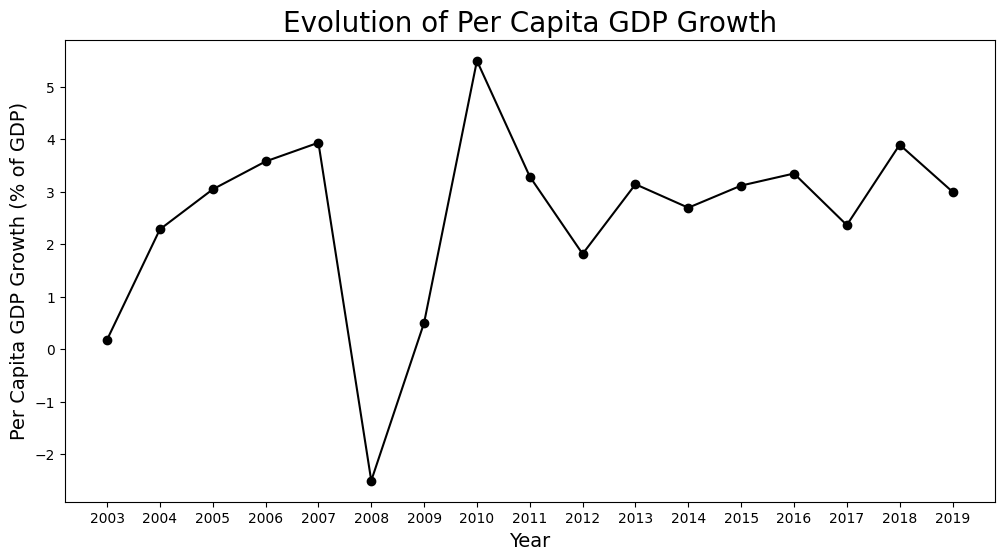

In [26]:
# check that in a plot
plt.figure(figsize=(12, 6))
plt.plot(data['ano_coleta'], data['pib_cresc_per_capita_%pib'], 'ko-')
plt.xlabel('Year', size=14)
plt.ylabel('Per Capita GDP Growth (% of GDP)', size=14)
plt.title('Evolution of Per Capita GDP Growth', size=20)
plt.xticks(ticks=data['ano_coleta'], labels=data['ano_coleta'])
plt.show()

### **2. In which year were the health expenditures the greatest?**

In [35]:
# create a new variable - total national expenditures
data['gasto_total'] = (data['despesa_nac_bruta_%pib'] / 100) * data['pib_moeda_local']

# create a new variable that shows the absolute expenditure in health
data['despesas_saude'] = (data['domestic_saude_despesas_%pib'] / 100) * data['pib_moeda_local']
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,despesas_saude,gasto_total,despesas_educacao
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.684544e+10,1.264569e+12,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.804450e+10,1.406186e+12,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,2.099095e+10,1.563375e+12,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.715787e+10,2.033580e+12,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,3.348360e+10,2.365221e+12,5.664704e+11


In [36]:
# extract the maximum value of 'despesas_saude'
max_health = data['despesas_saude'].max()

# get the year of maximum growth
data.loc[data['despesas_saude'] == max_health, ['ano_coleta', 'despesas_saude']]

,ano_coleta,despesas_saude
16,2019,1.999306e+11


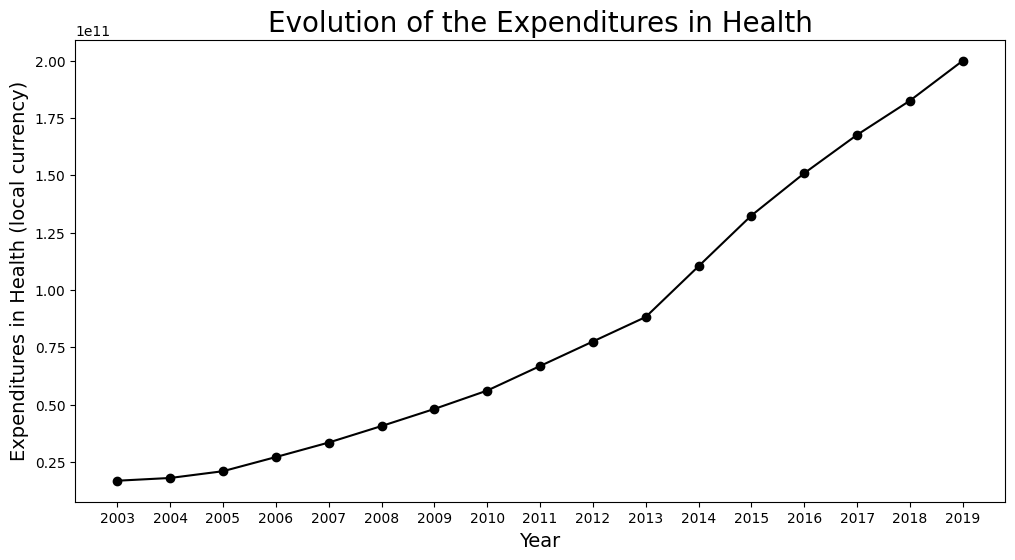

In [37]:
# check that in a plot
plt.figure(figsize=(12, 6))
plt.plot(data['ano_coleta'], data['despesas_saude'], 'ko-')
plt.xlabel('Year', size=14)
plt.ylabel('Expenditures in Health (local currency)', size=14)
plt.title('Evolution of the Expenditures in Health', size=20)
plt.xticks(ticks=data['ano_coleta'], labels=data['ano_coleta'])
plt.show()

### **3. In which year were the education expenditures the greatest?**

In [31]:
# check data again
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,despesas_saude
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,5.850294e+10
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,6.811161e+10
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,7.523729e+10
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,1.093651e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,1.290186e+11


In [32]:
# create a new variable - total national expenditures
data['gasto_total'] = (data['despesa_nac_bruta_%pib'] / 100) * data['pib_moeda_local']

# create a variable with the expenditures in education
data['despesas_educacao'] = (data['despesas_educ_total'] / 100) * data['gasto_total']

In [33]:
# extract the maximum value of 'despesas_educacao'
max_health = data['despesas_educacao'].max()

# get the year of maximum growth
data.loc[data['despesas_educacao'] == max_health, ['ano_coleta', 'despesas_educacao']]

,ano_coleta,despesas_educacao
16,2019,2.101781e+12


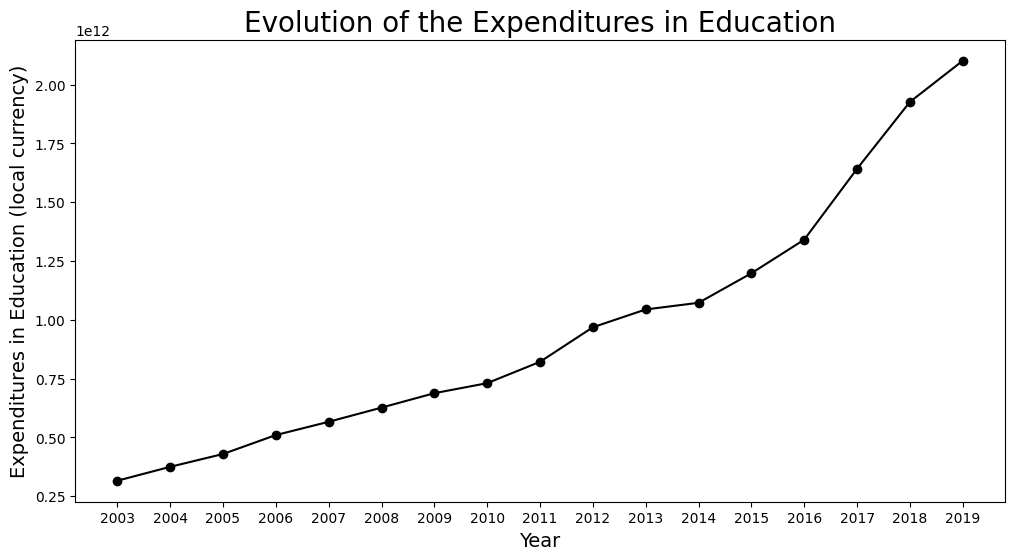

In [34]:
# check that in a plot
plt.figure(figsize=(12, 6))
plt.plot(data['ano_coleta'], data['despesas_educacao'], 'ko-')
plt.xlabel('Year', size=14)
plt.ylabel('Expenditures in Education (local currency)', size=14)
plt.title('Evolution of the Expenditures in Education', size=20)
plt.xticks(ticks=data['ano_coleta'], labels=data['ano_coleta'])
plt.show()

### **4. How are the government's revenues correlated with government's expenditures?**

In [38]:
# check data
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,despesas_saude,gasto_total,despesas_educacao
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.684544e+10,1.264569e+12,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.804450e+10,1.406186e+12,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,2.099095e+10,1.563375e+12,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.715787e+10,2.033580e+12,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,3.348360e+10,2.365221e+12,5.664704e+11


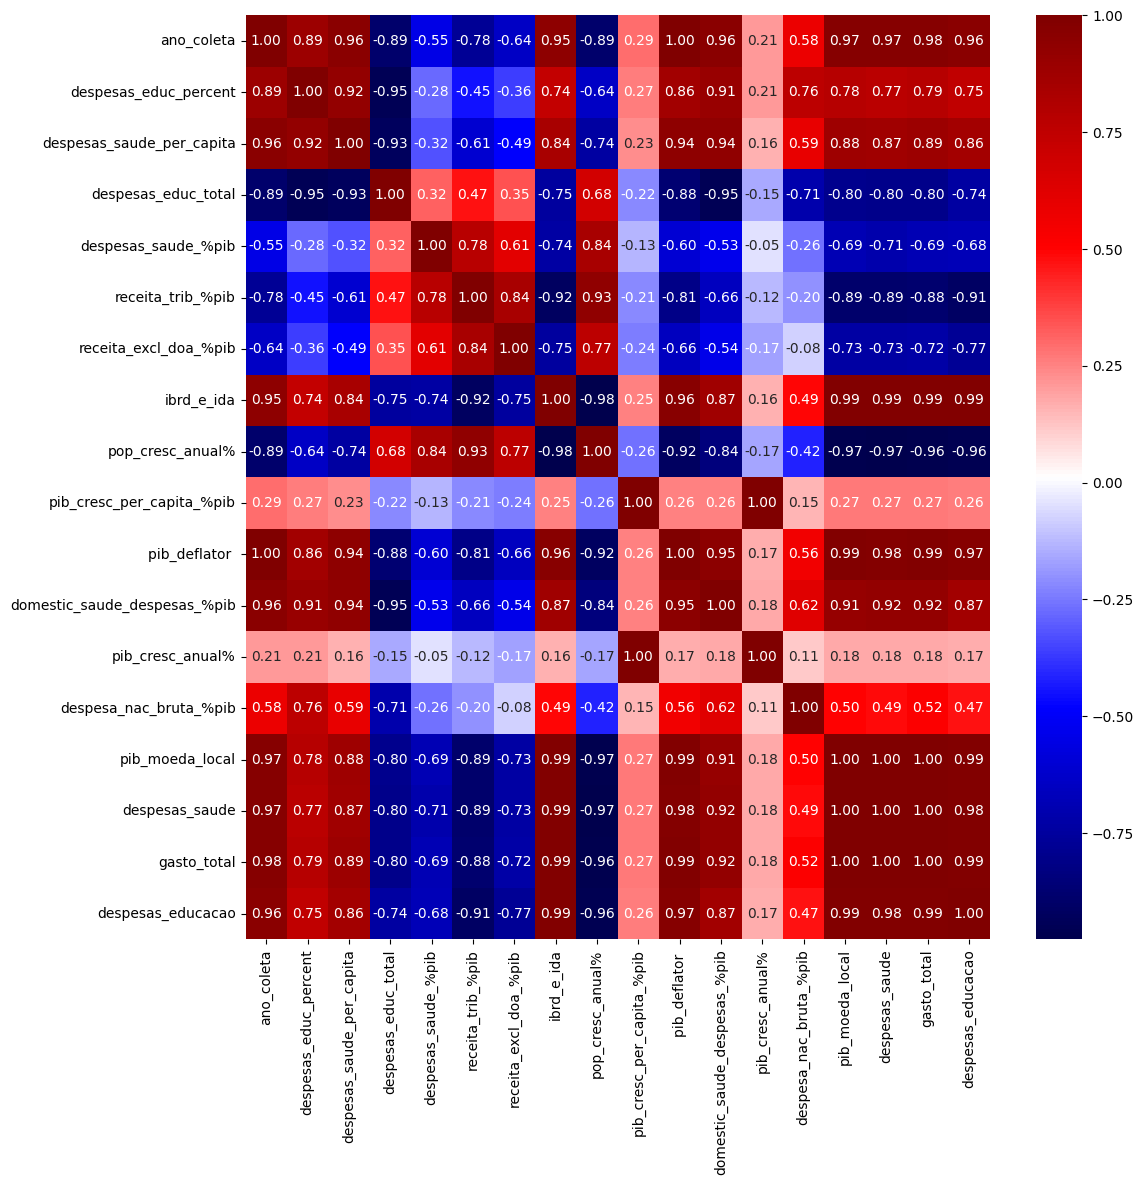

In [42]:
# calculate the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='seismic')
plt.show()

- the tax revenues is strongly and negatively correlated to the total expenditures  - the coefficient is - 0.88. Similar results are observed when looking to the expenditures in health and educations separately
- the revenues without donnations follow the same idea
- most probably, the increase in PIB during the year is the variable that affects both expenditures and revenues
- if we look directly to the percentages, the opposite occurs. The greater the tax income, the greater the expenditures in health (+0.74) and in education (+0.47). This indicates that the government does not tend to distribute equally the investments between health and expenditures.

### **5. How are education and health correlated with the GDP growth?**

- the correlations are weak. Not too much can be derived from the correlation matrix.
- for 'despesas_saude_%pib', the correlation with 'pib_cresc_anual%' is -0.05. Almost no correlation. It's necessary to test the significance of this number.
- for 'despesas_educ_total', the correlation is -0.15. Maybe free education has an effect here, because people tend to spend less with education.

### **6. How do the expenditures in Education and Health affect the GDP Growth?**

In [43]:
# check data
data.head()

,ano_coleta,despesas_educ_percent,despesas_saude_per_capita,despesas_educ_total,despesas_saude_%pib,receita_trib_%pib,receita_excl_doa_%pib,ibrd_e_ida,pop_cresc_anual%,pib_cresc_per_capita_%pib,pib_deflator,domestic_saude_despesas_%pib,pib_cresc_anual%,despesa_nac_bruta_%pib,pib_moeda_local,despesas_saude,gasto_total,despesas_educacao
0,2003,20.8507,25.4379,24.9801,5.1691,16.877,21.7389,2.741964e+09,2.7096,0.1809,51.8242,1.4884,2.9325,111.7326,1131782000000,1.684544e+10,1.264569e+12,3.158907e+11
1,2004,23.4095,27.5270,26.6682,5.3449,16.877,21.7389,2.882726e+09,2.7208,2.2832,55.5177,1.4160,5.1043,110.3472,1274329000000,1.804450e+10,1.406186e+12,3.750046e+11
2,2005,22.5437,30.9610,27.4693,5.3144,16.877,21.7389,2.663224e+09,2.7392,3.0450,58.2378,1.4827,5.9067,110.4293,1415725000000,2.099095e+10,1.563375e+12,4.294482e+11
3,2006,21.6778,40.9383,25.0814,5.8734,16.877,21.7389,2.764089e+09,2.7579,3.5762,71.9413,1.4585,6.4725,109.2124,1862041000000,2.715787e+10,2.033580e+12,5.100503e+11
4,2007,25.8529,50.3219,23.9500,5.9971,16.877,21.7389,2.968119e+09,2.7686,3.9331,77.7897,1.5564,6.8507,109.9413,2151349000000,3.348360e+10,2.365221e+12,5.664704e+11


In [44]:
# calculate the total expenditure in education and health
data['despesas_educ_saude'] = data['despesas_saude'] + data['despesas_educacao']

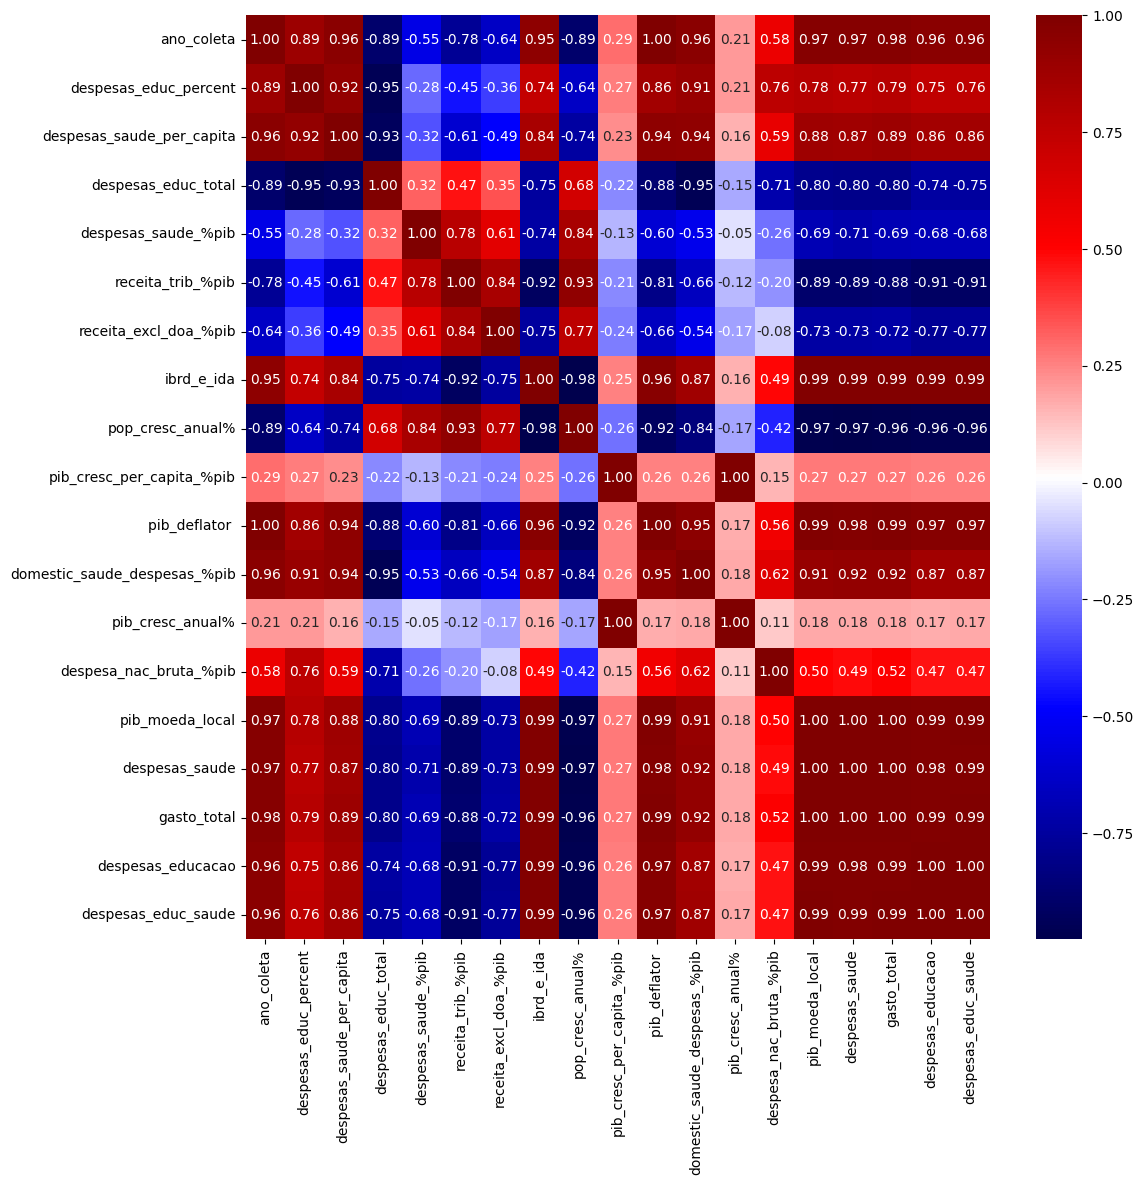

In [45]:
# calculate the correlation matrix - again
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='seismic')
plt.show()

- the expenditures in education and health have a slightly positive correlation (+0.26) with the GDP growth, which indicates a pattern of increasing the GDP as the consequence of investing more money in education and health.
- let's check the relationship

In [52]:
# train a linear model
model = LinearRegression().fit(X=data[['despesas_educ_saude']], y=data['pib_cresc_anual%'])

In [53]:
# check coefficients
model.coef_

array([5.27544021e-13])

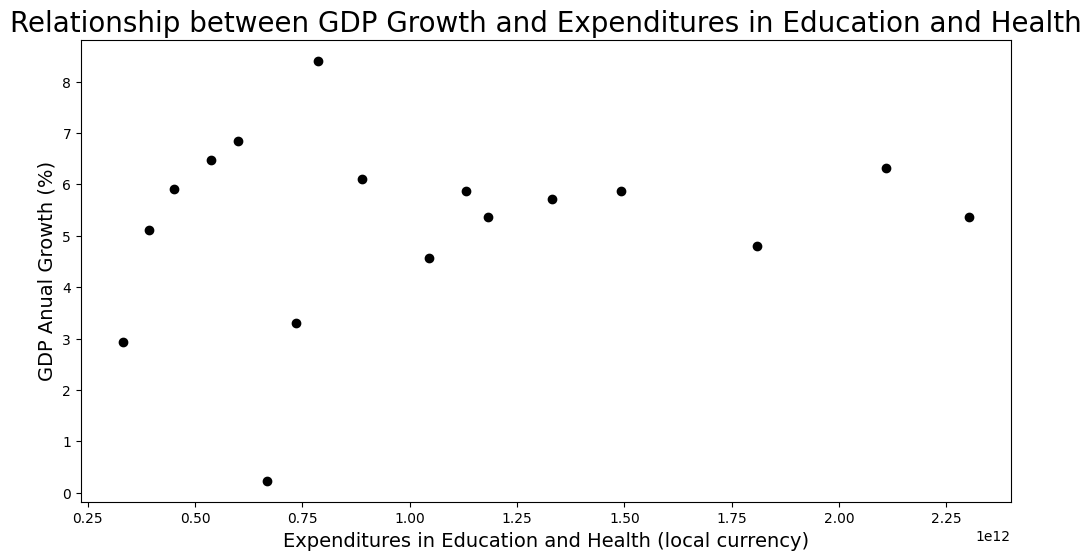

In [56]:
# check that in a plot
plt.figure(figsize=(12, 6))
plt.scatter(x=data['despesas_educ_saude'], y=data['pib_cresc_anual%'],color='black', marker='o')
plt.ylabel('GDP Anual Growth (%)', size=14)
plt.xlabel('Expenditures in Education and Health (local currency)', size=14)
plt.title('Relationship between GDP Growth and Expenditures in Education and Health', size=20)
plt.show()

- the relationship is not linear. It seems more a logarithm relationship, which indicates a limit for the growth promoted by the investment in education and health.
- this is probably due to the many other factors that affect the GDP growth.
- the slope is very close to zero, which indicates a non-significant relationship.

### **7. Regarding the results of the analysis, which are the recommendations for governants and managers?**

- the govern should invest more in the human development (health and education) and ensure this investment
- however these are not the unique factors that determine GDP growth
- the revenues are negatively correlated with the expenditures in education and health
- the govern tend to invest differently in health and education along the years. This should be fixed, and the investments should be balanced.